In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

### Load Data

In [3]:
playlist_features = pd.read_csv('csv_files/playlist_features.csv')
playlist_features.set_index('name', inplace=True)
playlist_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,,,,,,,,,,,
849 find out,0.4830,0.7075,9.0,-7.7135,1.0,0.04295,0.48650,0.008570,0.1050,0.5655,118.3540
848 innocence,0.6425,0.6660,7.5,-6.0575,0.5,0.04825,0.12395,0.000063,0.1145,0.6500,138.6175
847 sick joke,0.5200,0.3220,6.0,-10.7800,1.0,0.03780,0.77500,0.000027,0.1260,0.3770,142.9120
846 save me,0.6520,0.6470,8.5,-7.4910,1.0,0.05930,0.20260,0.026150,0.1145,0.5010,129.0055
845 what did you expect,0.6430,0.5325,7.0,-9.1490,0.0,0.04580,0.29700,0.016465,0.1245,0.4820,117.8560


In [4]:
genres = pd.read_csv('csv_files/genres.csv')
genres = genres[['name', 'genres']]
genres.head()

,name,genres
0,849 find out,"['indie pop', 'modern indie folk', 'hyperpop',..."
1,848 innocence,"['social media pop', 'alternative r&b', 'art p..."
2,847 sick joke,"['bedroom pop', 'bubblegrunge', 'indie pop', '..."
3,846 save me,"['experimental indie', 'art pop', 'canadian el..."
4,845 what did you expect,"['alternative r&b', 'art pop', 'escape room', ..."


In [9]:
genres['genres'] = genres['genres'].apply(ast.literal_eval)
all_genres = [genre for playlist_genres in genres['genres'] for genre in playlist_genres]
genre_cols = list(set(all_genres))

counted = [pd.Series(playlist_genres).value_counts().to_dict() for playlist_genres in genres['genres']]

genre_counts = genres.copy().drop('genres', axis=1).set_index('name')
genre_counts['counted'] = counted

gc = pd.json_normalize(genre_counts['counted'])
gc = gc.fillna(0)
gc = gc.astype(int)
gc = gc.set_index(genres['name'])
gc

,indie pop,modern indie folk,hyperpop,hypnagogic pop,art pop,escape room,alternative r&b,pop,social media pop,chillwave,...,neo-singer-songwriter,japanese chillhop,indie emo,electronic trap,progressive electro house,classic girl group,dalarna indie,swedish garage rock,dmv rap,malaysian pop
name,,,,,,,,,,,,,,,,,,,,,
849 find out,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848 innocence,0,0,0,1,3,2,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0
847 sick joke,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
846 save me,0,0,0,1,3,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
845 what did you expect,0,0,0,1,3,1,3,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00 think about it,3,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
00 remember,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00 remind me,1,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Merge DataFrames

In [10]:
features = gc.join(playlist_features)
features.head()

,indie pop,modern indie folk,hyperpop,hypnagogic pop,art pop,escape room,alternative r&b,pop,social media pop,chillwave,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,,,,,,,,,,,,,,,,,,,,,
849 find out,1,1,1,1,0,0,0,0,0,0,...,0.7075,9.0,-7.7135,1.0,0.04295,0.48650,0.008570,0.1050,0.5655,118.3540
848 innocence,0,0,0,1,3,2,2,2,1,1,...,0.6660,7.5,-6.0575,0.5,0.04825,0.12395,0.000063,0.1145,0.6500,138.6175
847 sick joke,1,0,0,0,0,0,0,0,0,0,...,0.3220,6.0,-10.7800,1.0,0.03780,0.77500,0.000027,0.1260,0.3770,142.9120
846 save me,0,0,0,1,3,0,0,1,0,1,...,0.6470,8.5,-7.4910,1.0,0.05930,0.20260,0.026150,0.1145,0.5010,129.0055
845 what did you expect,0,0,0,1,3,1,3,0,0,1,...,0.5325,7.0,-9.1490,0.0,0.04580,0.29700,0.016465,0.1245,0.4820,117.8560


In [63]:
for column in features.columns:
    features[column] = features[column] / features[column].abs().max()

features.head()

,indie pop,modern indie folk,hyperpop,hypnagogic pop,art pop,escape room,alternative r&b,pop,social media pop,chillwave,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,max_cosine_similarity
name,,,,,,,,,,,,,,,,,,,,,
849 find out,0.111111,0.5,0.25,0.5,0.000,0.0,0.000000,0.000000,0.0,0.00,...,0.818182,-0.499806,1.0,0.146337,0.513186,0.011953,0.323575,0.640068,0.715857,0.320346
848 innocence,0.000000,0.0,0.00,0.5,0.375,0.4,0.285714,0.285714,1.0,0.25,...,0.681818,-0.392503,0.5,0.164395,0.130749,0.000088,0.352851,0.735710,0.838419,0.955628
847 sick joke,0.111111,0.0,0.00,0.0,0.000,0.0,0.000000,0.000000,0.0,0.00,...,0.545455,-0.698503,1.0,0.128790,0.817511,0.000038,0.388290,0.426712,0.864394,0.966450
846 save me,0.000000,0.0,0.00,0.5,0.375,0.0,0.000000,0.142857,0.0,0.25,...,0.772727,-0.485388,1.0,0.202044,0.213713,0.036471,0.352851,0.567063,0.780281,0.363636
845 what did you expect,0.000000,0.0,0.00,0.5,0.375,0.2,0.428571,0.000000,0.0,0.25,...,0.636364,-0.592821,0.0,0.156048,0.313291,0.022964,0.383667,0.545557,0.712844,0.885281


### SVD

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD

In [64]:
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(features.values)

print(X_reduced)

[[ 1.8614318  -0.33478226]
 [ 1.90633613 -0.88507572]
 [ 2.00872892 -0.14785349]
 ...
 [ 2.1590744   0.90352452]
 [ 2.21949447  1.00258258]
 [ 2.51545203 -0.40177685]]


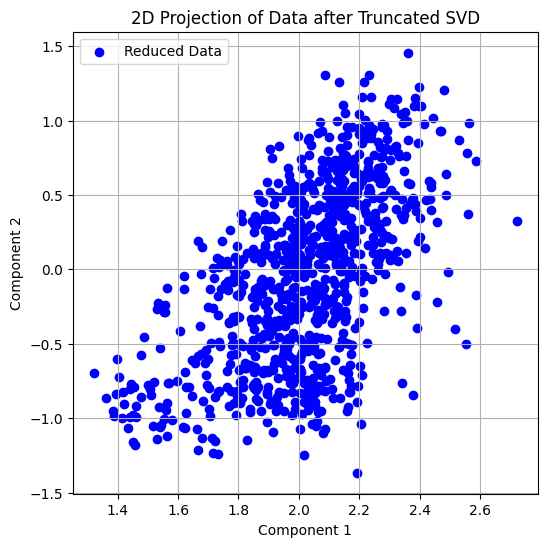

In [65]:
plt.figure(figsize=(6, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], color='blue', label='Reduced Data')
plt.title("2D Projection of Data after Truncated SVD")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.legend()
plt.show()

In [66]:
similarity = cosine_similarity(X_reduced)

print(similarity)

[[1.         0.96722882 0.99454728 ... 0.83958209 0.82407432 0.99980863]
 [0.96722882 1.         0.93547576 ... 0.67413776 0.65323516 0.96207664]
 [0.99454728 0.93547576 1.         ... 0.89165601 0.87865734 0.99639708]
 ...
 [0.83958209 0.67413776 0.89165601 ... 1.         0.9996095  0.85004851]
 [0.82407432 0.65323516 0.87865734 ... 0.9996095  1.         0.83499852]
 [0.99980863 0.96207664 0.99639708 ... 0.85004851 0.83499852 1.        ]]


In [75]:
np.fill_diagonal(similarity, -np.inf)

max_cosine_similarities = [np.argpartition(row, -5)[-5:] for row in similarity]
features['max_cosine_similarity'] = max_cosine_similarities

In [76]:
features

,indie pop,modern indie folk,hyperpop,hypnagogic pop,art pop,escape room,alternative r&b,pop,social media pop,chillwave,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,max_cosine_similarity
name,,,,,,,,,,,,,,,,,,,,,
849 find out,0.111111,0.5,0.25,0.5,0.000,0.0,0.000000,0.000000,0.0,0.00,...,0.818182,-0.499806,1.0,0.146337,0.513186,0.011953,0.323575,0.640068,0.715857,"[171, 700, 314, 18, 70]"
848 innocence,0.000000,0.0,0.00,0.5,0.375,0.4,0.285714,0.285714,1.0,0.25,...,0.681818,-0.392503,0.5,0.164395,0.130749,0.000088,0.352851,0.735710,0.838419,"[726, 541, 129, 364, 722]"
847 sick joke,0.111111,0.0,0.00,0.0,0.000,0.0,0.000000,0.000000,0.0,0.00,...,0.545455,-0.698503,1.0,0.128790,0.817511,0.000038,0.388290,0.426712,0.864394,"[282, 849, 247, 598, 587]"
846 save me,0.000000,0.0,0.00,0.5,0.375,0.0,0.000000,0.142857,0.0,0.25,...,0.772727,-0.485388,1.0,0.202044,0.213713,0.036471,0.352851,0.567063,0.780281,"[671, 162, 145, 475, 452]"
845 what did you expect,0.000000,0.0,0.00,0.5,0.375,0.2,0.428571,0.000000,0.0,0.25,...,0.636364,-0.592821,0.0,0.156048,0.313291,0.022964,0.383667,0.545557,0.712844,"[274, 326, 206, 147, 837]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00 think about it,0.333333,0.0,0.00,0.0,0.125,0.0,0.000000,0.142857,0.0,0.00,...,0.181818,-0.549472,1.0,0.107325,0.357595,0.000423,0.345146,0.342954,0.784803,"[538, 227, 657, 901, 81]"
00 remember,0.000000,0.0,0.00,0.0,0.000,0.0,0.000000,0.000000,0.0,0.00,...,0.727273,-0.536383,1.0,0.100170,0.473629,0.000421,0.382126,0.499151,0.741998,"[418, 895, 390, 739, 645]"
00 remind me,0.111111,0.0,0.00,0.0,0.250,0.0,0.000000,0.000000,0.0,0.00,...,0.272727,-0.733169,1.0,0.115162,0.622363,0.003152,0.363636,0.408602,0.487449,"[278, 318, 721, 425, 355]"


In [80]:
rec = pd.DataFrame(features['max_cosine_similarity'])
rec['rec'] = features['max_cosine_similarity'].apply(lambda x: [features.iloc[i].name for i in x])
rec.drop('max_cosine_similarity', axis=1, inplace=True)
rec

,rec
name,
849 find out,"[677 do this again, 147 in the dark, 534 make ..."
848 innocence,"[121 history, 307 for sure, 719 mis secretos, ..."
847 sick joke,"[566 fade, 00 i was dreaming, 601 off chance, ..."
846 save me,"[176 close to you, 686 graceless, 703 i like i..."
845 what did you expect,"[574 if you want to, 522 it's your world, 642 ..."
...,...
00 think about it,"[310 then again, 621 think about you, 190 numb..."
00 remember,"[430 we can be anything, 00 keep me, 458 full ..."
00 remind me,"[570 bone and blood, 530 hard to change, 126 a..."
